In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline

### Importing Dataset

In [2]:
df=pd.read_csv("employment.csv", parse_dates=True, index_col="datestamp")

In [3]:
df.head()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


In [4]:
df.columns = df.columns.str.replace(" ","")

In [5]:
df.isna().sum(axis=0)

Agriculture                     0
Businessservices                0
Construction                    0
Durablegoodsmanufacturing       0
EducationandHealth              0
Finance                         0
Government                      0
Information                     0
Leisureandhospitality           0
Manufacturing                   0
MiningandExtraction             0
Nondurablegoodsmanufacturing    0
Other                           0
Self-employed                   0
TransportationandUtilities      0
WholesaleandRetailTrade         0
dtype: int64

In [6]:
df[df >= 0 ].isna().sum(axis = 0)

Agriculture                     0
Businessservices                0
Construction                    0
Durablegoodsmanufacturing       0
EducationandHealth              0
Finance                         0
Government                      0
Information                     0
Leisureandhospitality           0
Manufacturing                   0
MiningandExtraction             0
Nondurablegoodsmanufacturing    0
Other                           0
Self-employed                   0
TransportationandUtilities      0
WholesaleandRetailTrade         0
dtype: int64

### Answer 3

In [7]:
industry_columns = ['Agriculture', 'Businessservices', 'Construction',
       'Durablegoodsmanufacturing', 'EducationandHealth', 'Finance',
       'Government', 'Information', 'Leisureandhospitality', 'Manufacturing',
       'MiningandExtraction', 'Nondurablegoodsmanufacturing', 'TransportationandUtilities',
       'WholesaleandRetailTrade']

<AxesSubplot:>

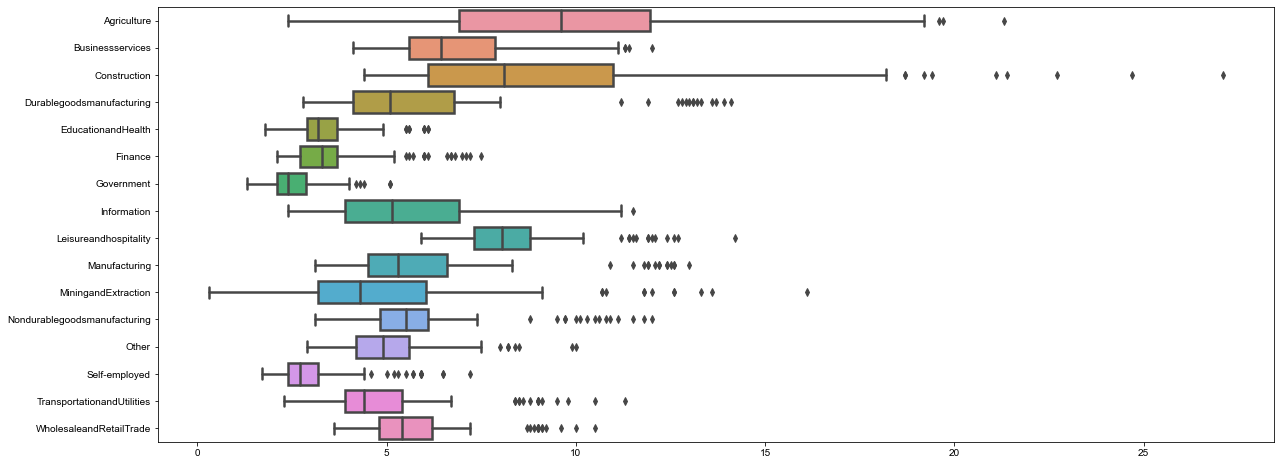

In [8]:
fig, ax = pt.subplots(figsize=(20,8))
sns.set_theme(style="darkgrid")
sns.boxplot( orient = "h", data = df , linewidth=2.5, ax=ax)

### Answer 4

<AxesSubplot:xlabel='datestamp'>

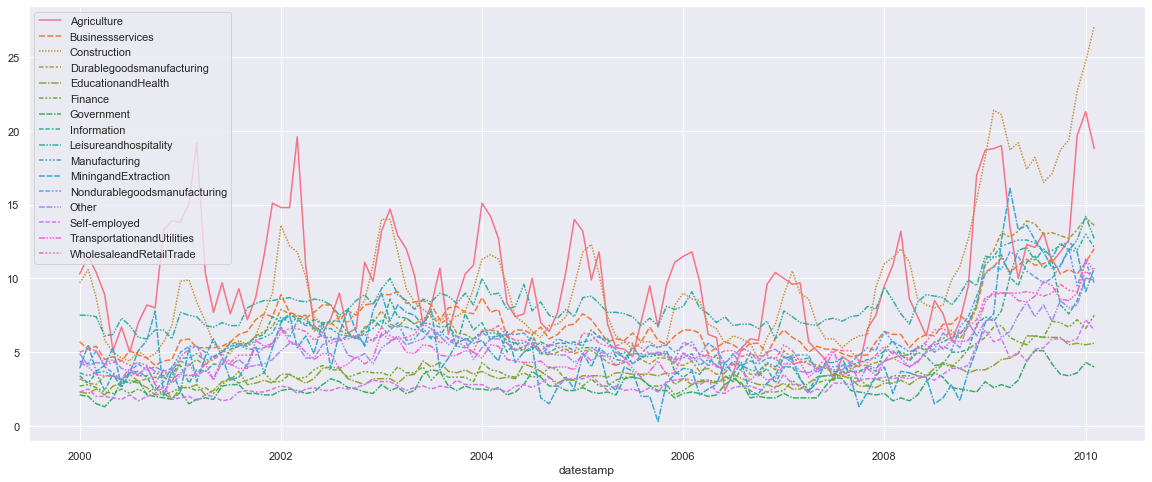

In [9]:
fig, ax = pt.subplots(figsize=(20,8))
sns.set_theme(style="darkgrid")
sns.lineplot( data = df )

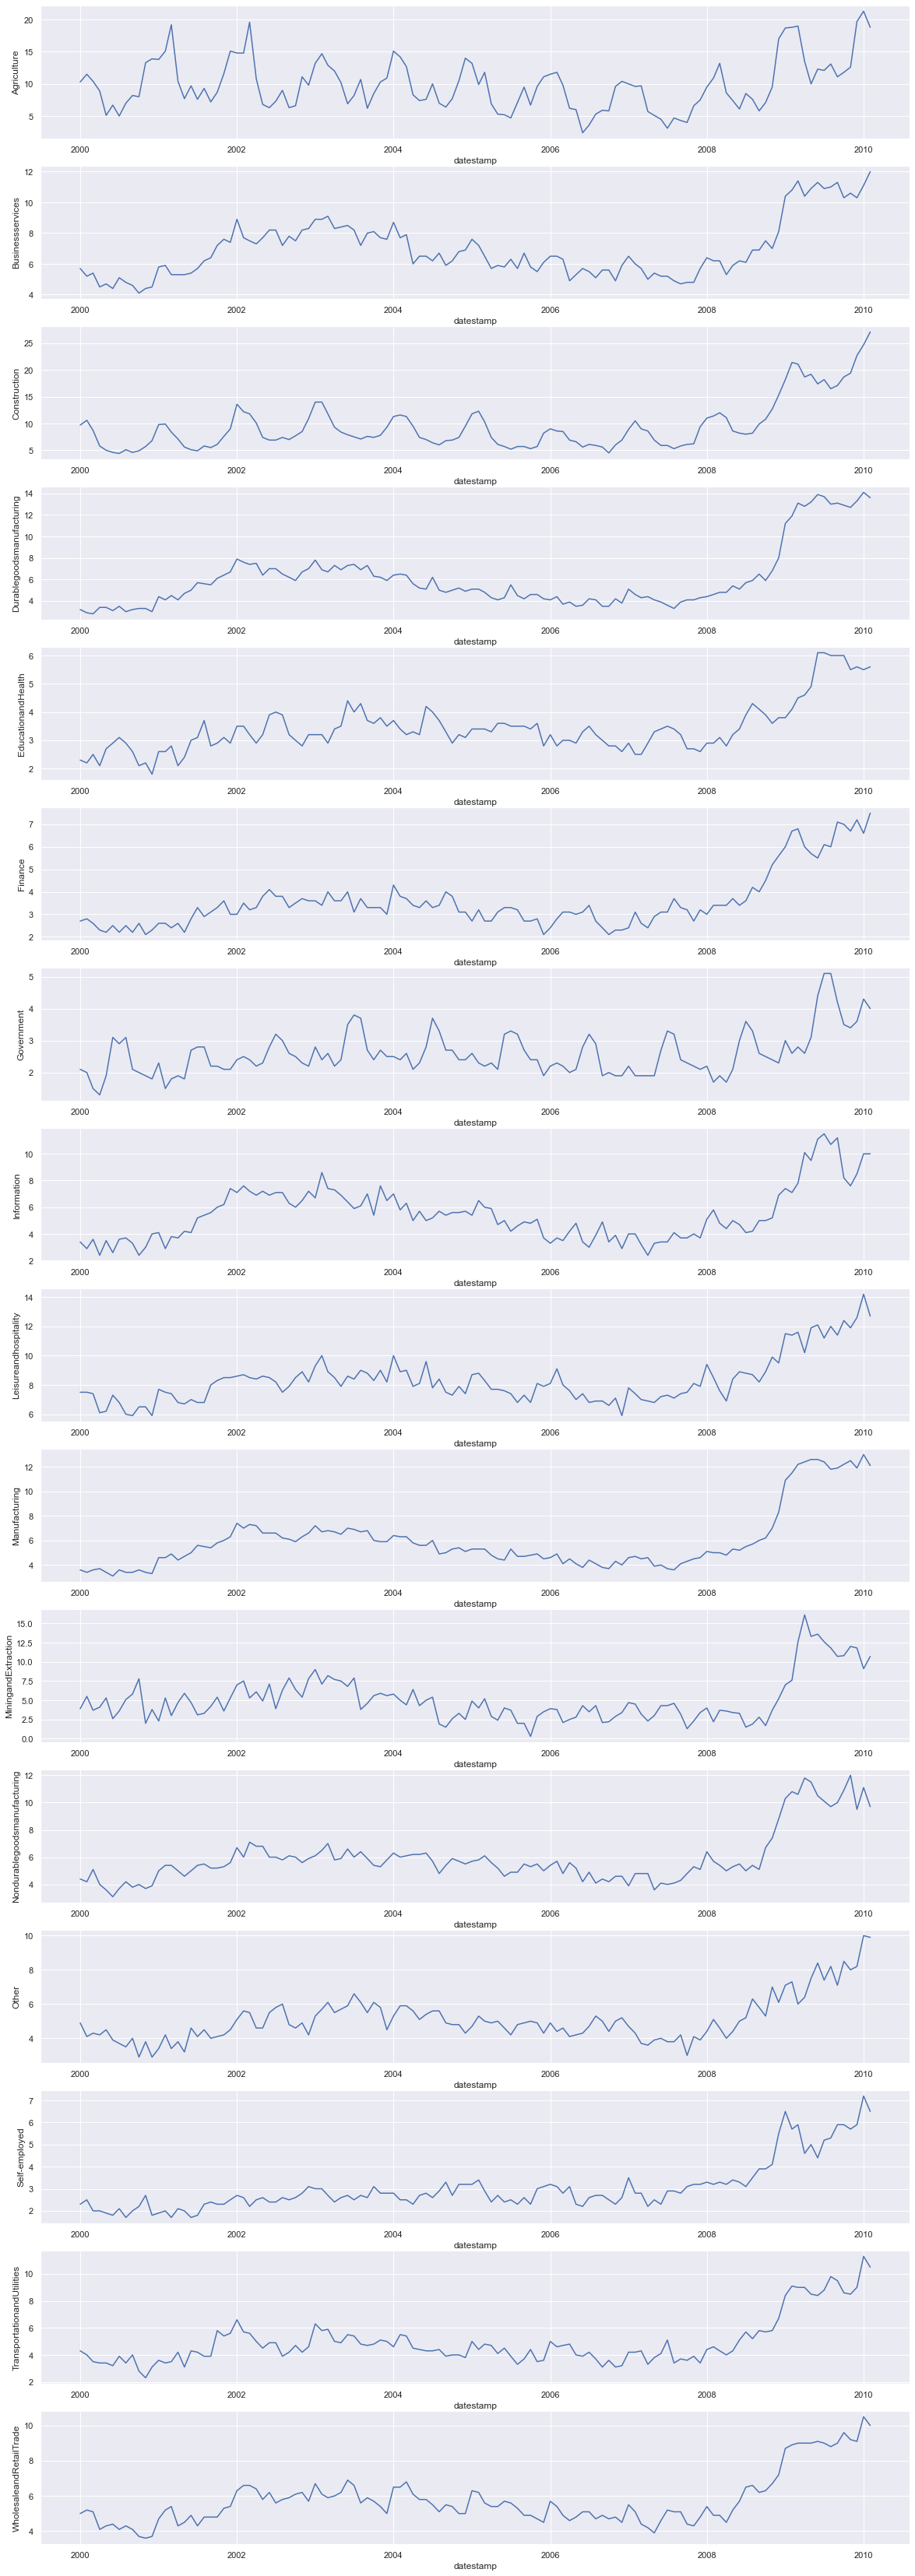

In [10]:
fig , axes = pt.subplots(df.shape[1],1,figsize = (20,60))
for industry , ax in zip(df.columns,axes):
    sns.lineplot(x = df.index , y = industry , data = df , ax=ax)

### Answer 5

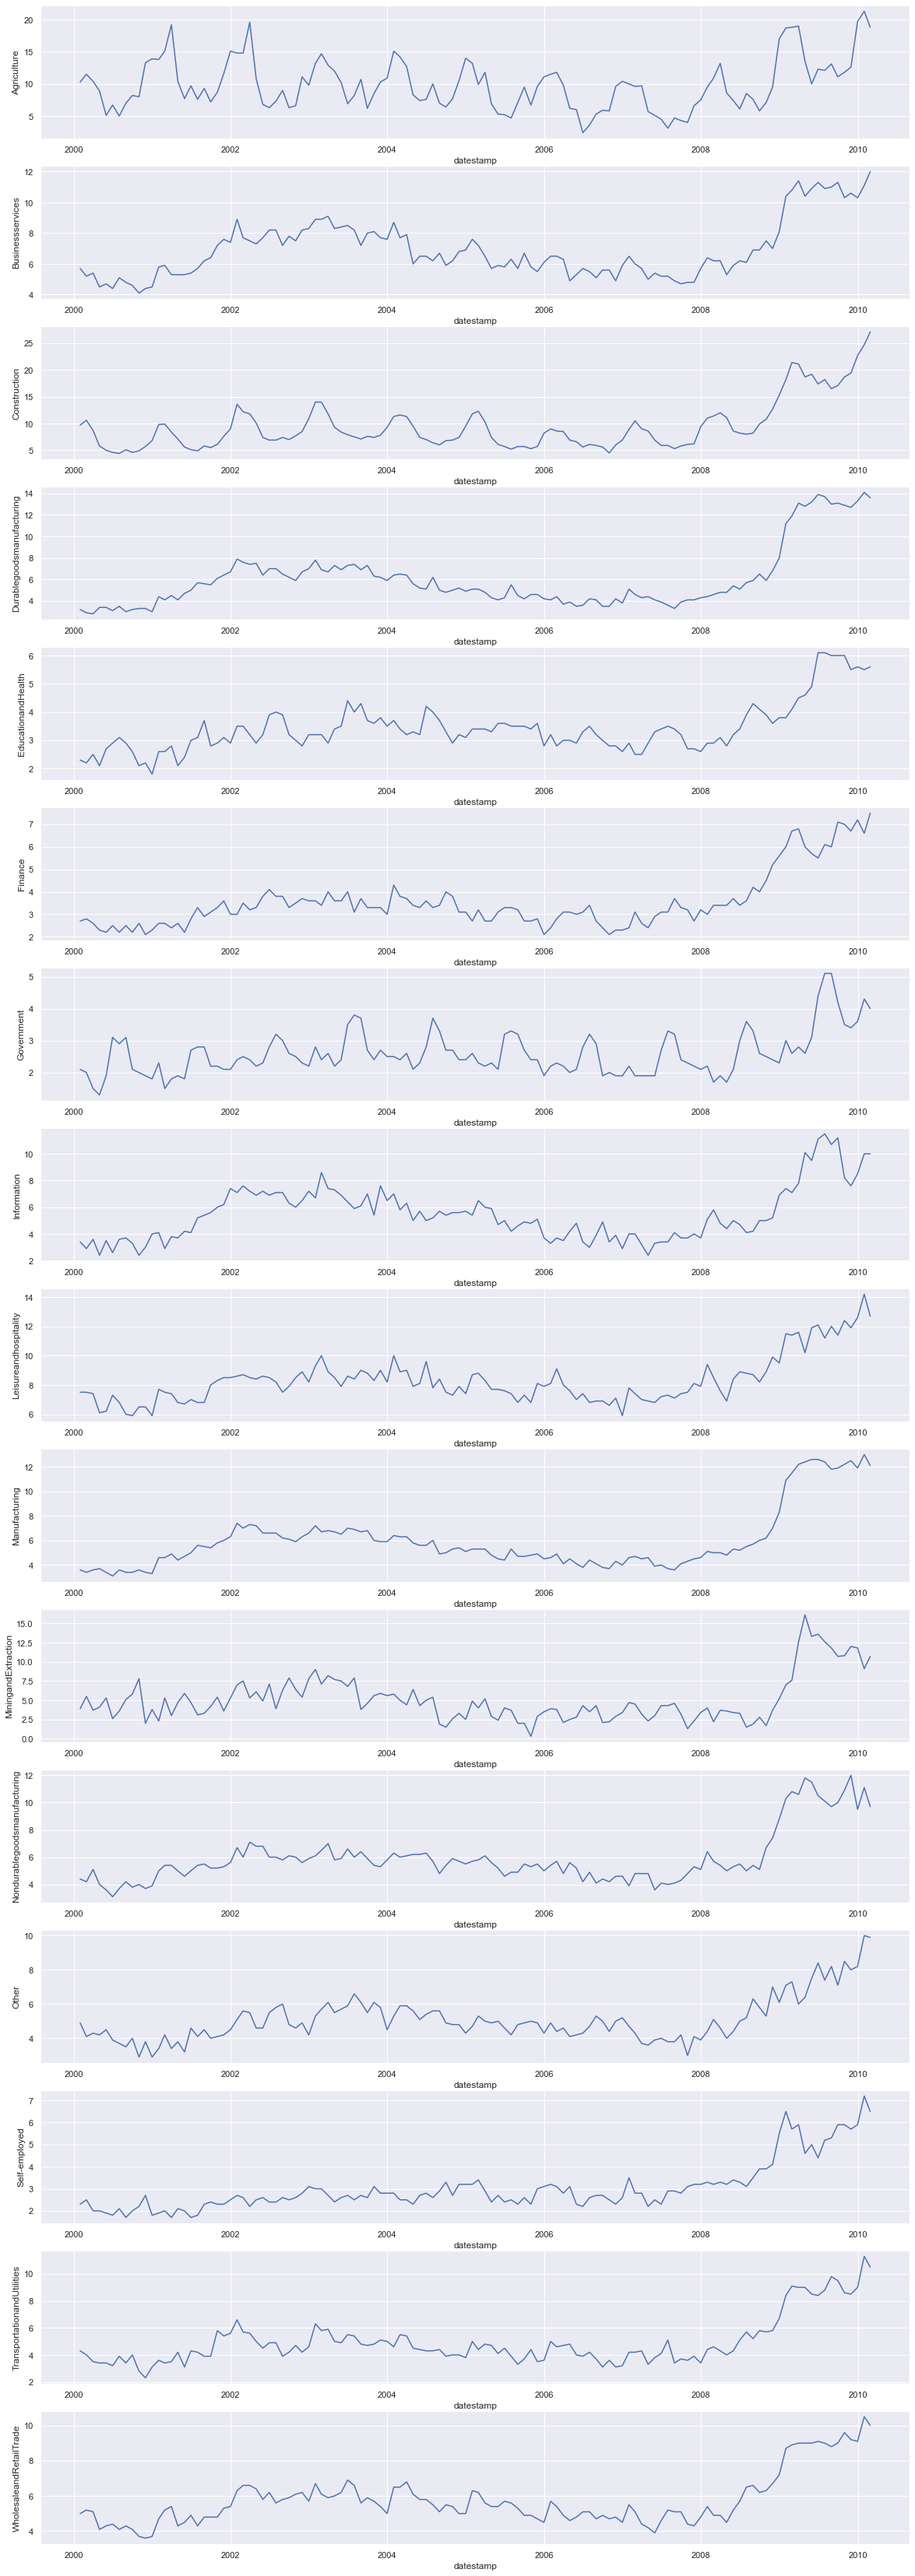

In [11]:
### Monthly Trends Seperately
df_month_mean = df.resample("M").mean()
fig , axes = pt.subplots(df.shape[1],1,figsize = (20,60))
for industry , ax in zip(df_month_mean.columns,axes):
    sns.lineplot(x = df_month_mean.index, y = df_month_mean.loc[:, industry], ax=ax)

<AxesSubplot:xlabel='datestamp'>

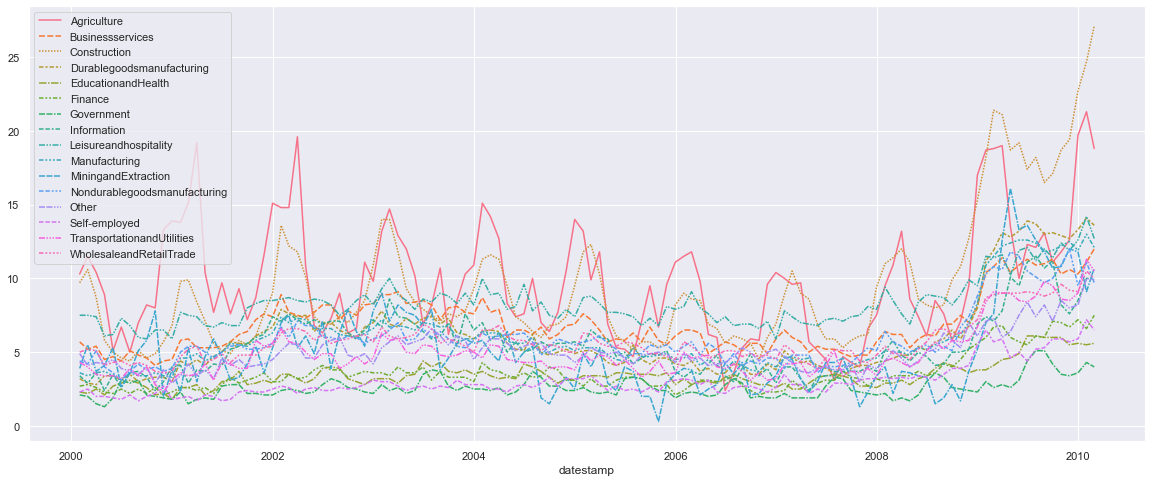

In [12]:
### Monthly Trend Together
fig, ax = pt.subplots(figsize=(20,8))
sns.set_theme(style="darkgrid")
sns.lineplot( data = df_month_mean )

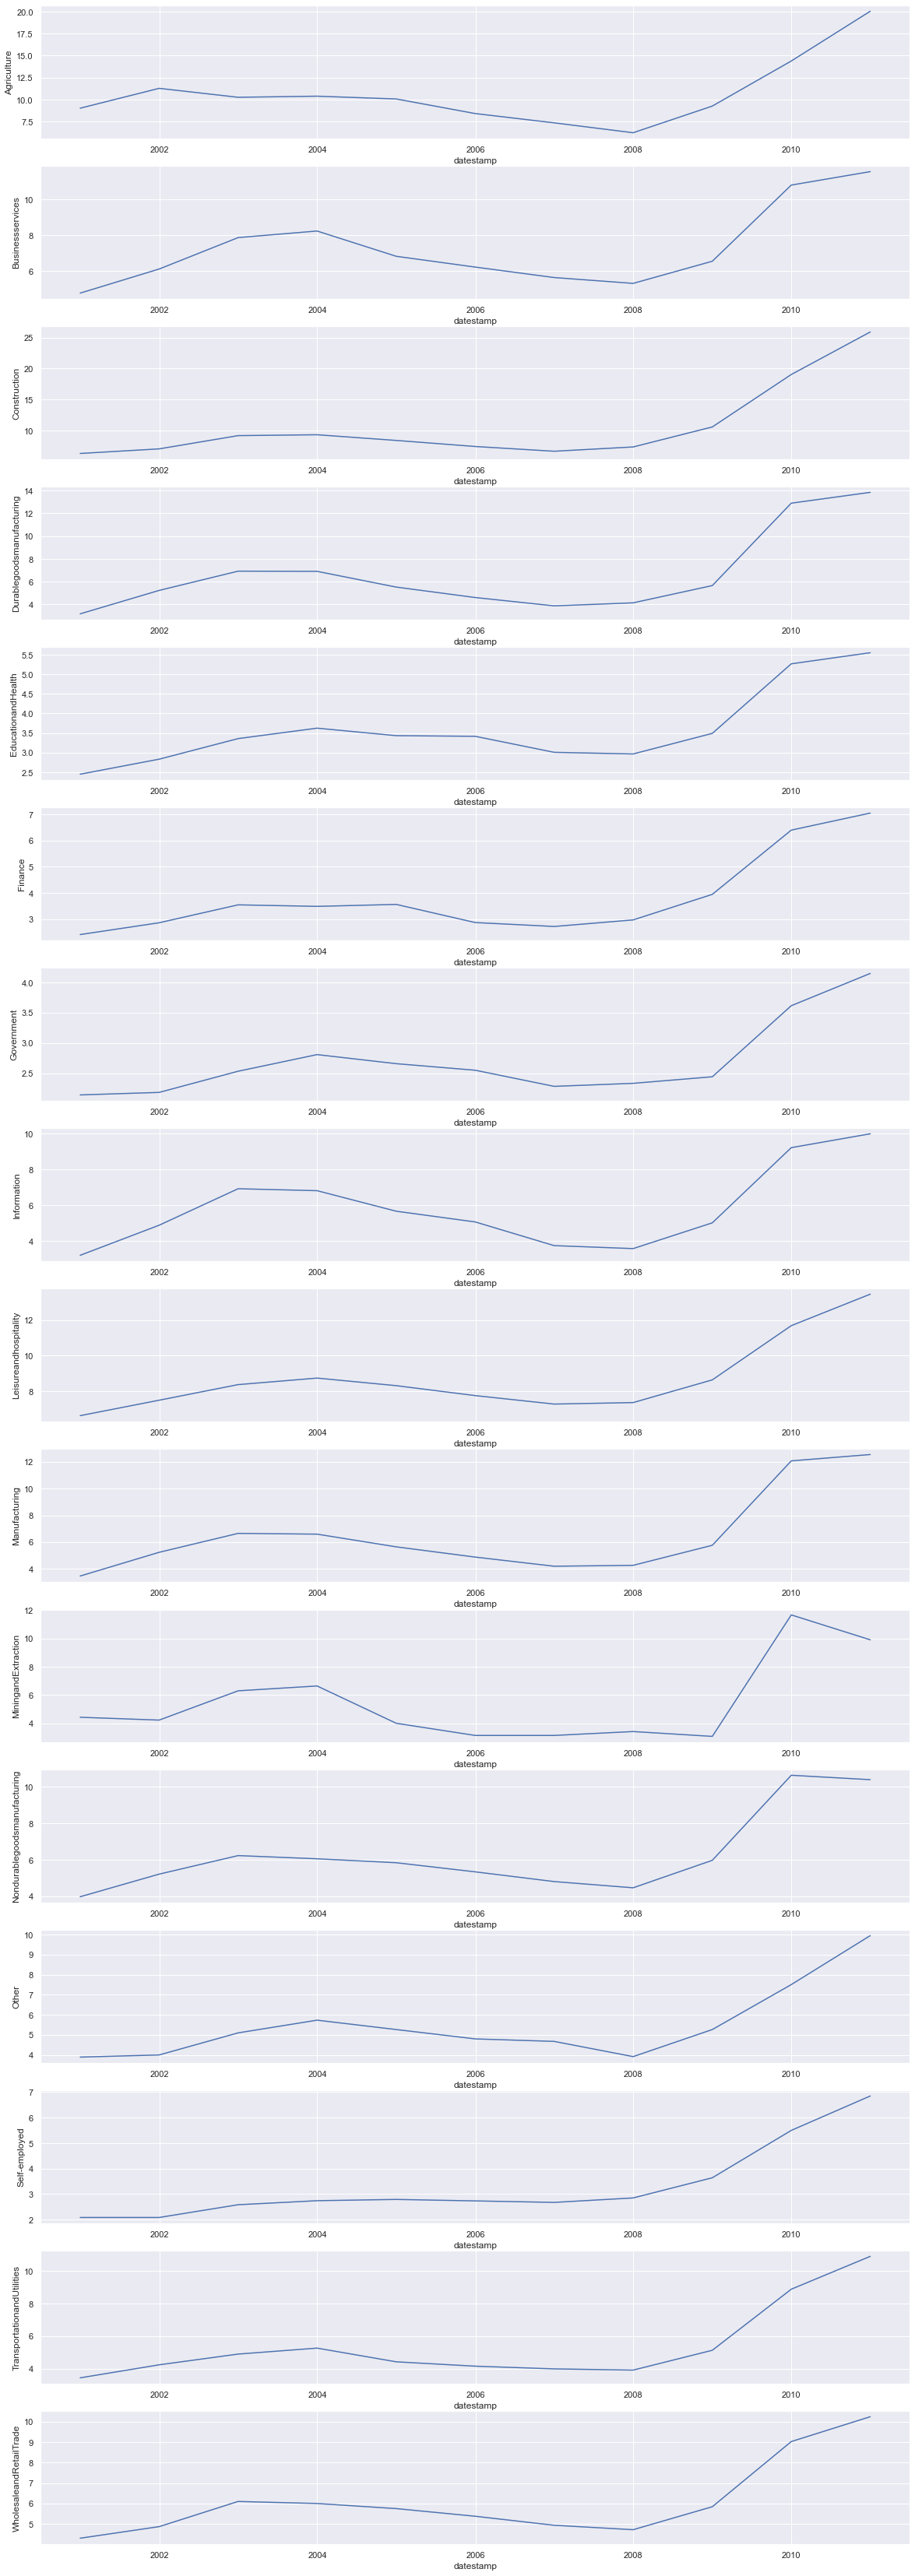

In [13]:
### Yearly Trends Seperately
df_year_mean = df.resample("Y").mean()
fig , axes = pt.subplots(df.shape[1],1,figsize = (20,60))
for industry , ax in zip(df_year_mean.columns,axes):
    sns.lineplot(x = df_year_mean.index, y = df_year_mean.loc[:, industry], ax=ax)

<AxesSubplot:xlabel='datestamp'>

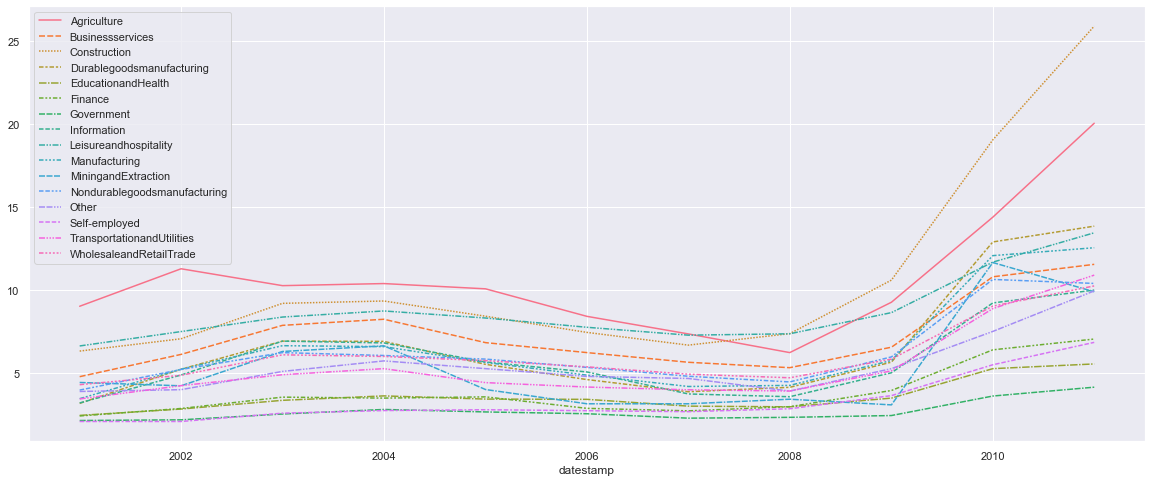

In [14]:
### Yearly Trends Together
fig, ax = pt.subplots(figsize=(20,8))
sns.set_theme(style="darkgrid")
sns.lineplot( data = df_year_mean)

### Answer 6

In [15]:
from pylab import rcParams
import statsmodels.api as sm

In [16]:
df_month_decomposition_additive = pd.DataFrame()
for industry in df.columns:
    df_month_decomposition_additive[industry+'Trend'] = sm.tsa.seasonal_decompose(df_month_mean[industry], model='Additive').trend
    df_month_decomposition_additive[industry+'Seasonal'] = sm.tsa.seasonal_decompose(df_month_mean[industry], model='Additive').seasonal
    df_month_decomposition_additive[industry+'Residue'] = sm.tsa.seasonal_decompose(df_month_mean[industry], model='Additive').resid
    df_month_decomposition_additive = pd.DataFrame(df_month_decomposition_additive)

In [17]:
df_month_decomposition_multiplicative = pd.DataFrame()
for industry in df.columns:
    df_month_decomposition_multiplicative[industry+'Trend'] = sm.tsa.seasonal_decompose(df_month_mean[industry], model='multiplicative').trend
    df_month_decomposition_multiplicative[industry+'Seasonal'] = sm.tsa.seasonal_decompose(df_month_mean[industry], model='multiplicative').seasonal
    df_month_decomposition_multiplicative[industry+'Residue'] = sm.tsa.seasonal_decompose(df_month_mean[industry], model='multiplicative').resid
    df_month_decomposition_multiplicative = pd.DataFrame(df_month_decomposition_multiplicative)

In [18]:
df_year_decomposition_additive = pd.DataFrame()
for industry in df.columns:
    df_year_decomposition_additive[industry+'Trend'] = sm.tsa.seasonal_decompose(df_year_mean[industry], model='Additive').trend
    df_year_decomposition_additive[industry+'Seasonal'] = sm.tsa.seasonal_decompose(df_year_mean[industry], model='Additive').seasonal
    df_year_decomposition_additive[industry+'Residue'] = sm.tsa.seasonal_decompose(df_year_mean[industry], model='Additive').resid
    df_year_decomposition_additive = pd.DataFrame(df_year_decomposition_additive)

In [19]:
df_year_decomposition_multiplicative = pd.DataFrame()
for industry in df.columns:
    df_year_decomposition_multiplicative[industry+'Trend'] = sm.tsa.seasonal_decompose(df_year_mean[industry], model='multiplicative').trend
    df_year_decomposition_multiplicative[industry+'Seasonal'] = sm.tsa.seasonal_decompose(df_year_mean[industry], model='multiplicative').seasonal
    df_year_decomposition_multiplicative[industry+'Residue'] = sm.tsa.seasonal_decompose(df_year_mean[industry], model='multiplicative').resid
    df_year_decomposition_multiplicative = pd.DataFrame(df_year_decomposition_multiplicative)

### Answer 7

<AxesSubplot:xlabel='datestamp', ylabel='AgricultureResidue'>

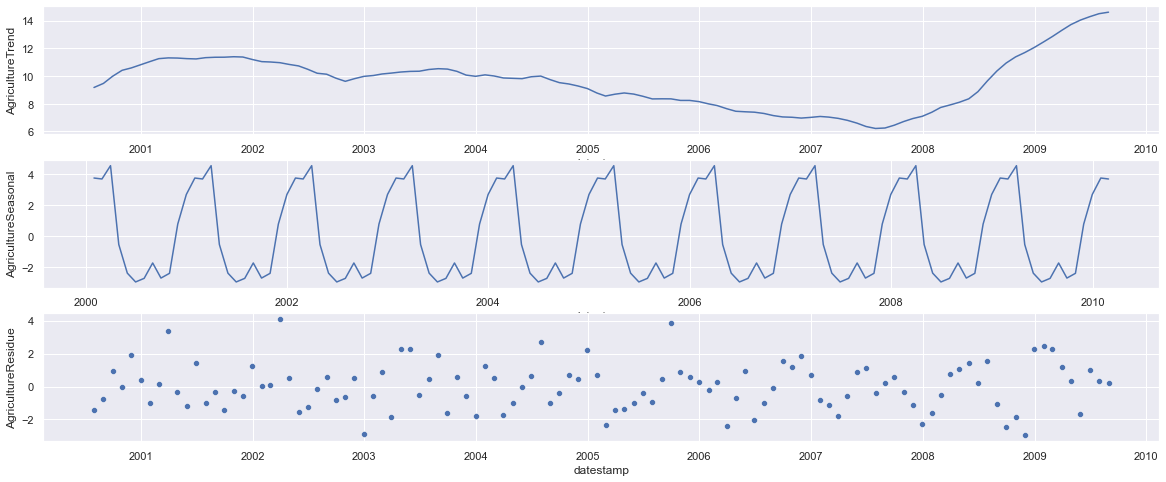

In [20]:
## Agriculture
fig , axes = pt.subplots(3,1,figsize=(20,8))
sns.lineplot( x = df_month_decomposition_additive.index , y = 'AgricultureTrend' , data = df_month_decomposition_additive , ax=axes[0])
sns.lineplot( x = df_month_decomposition_additive.index , y = 'AgricultureSeasonal' , data = df_month_decomposition_additive , ax=axes[1])
sns.scatterplot( x = df_month_decomposition_additive.index , y = 'AgricultureResidue' , data = df_month_decomposition_additive , ax=axes[2])

<AxesSubplot:xlabel='datestamp', ylabel='EducationandHealthResidue'>

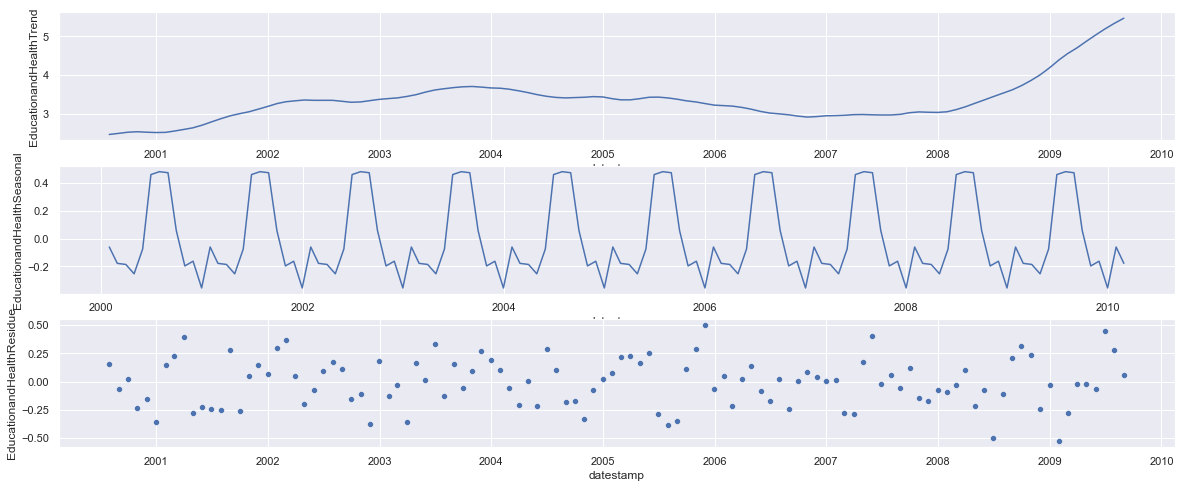

In [21]:
## Health
fig , axes = pt.subplots(3,1,figsize=(20,8))
sns.lineplot( x = df_month_decomposition_additive.index , y = 'EducationandHealthTrend' , data = df_month_decomposition_additive , ax=axes[0])
sns.lineplot( x = df_month_decomposition_additive.index , y = 'EducationandHealthSeasonal' , data = df_month_decomposition_additive , ax=axes[1])
sns.scatterplot( x = df_month_decomposition_additive.index , y = 'EducationandHealthResidue' , data = df_month_decomposition_additive , ax=axes[2])

<AxesSubplot:xlabel='datestamp', ylabel='FinanceResidue'>

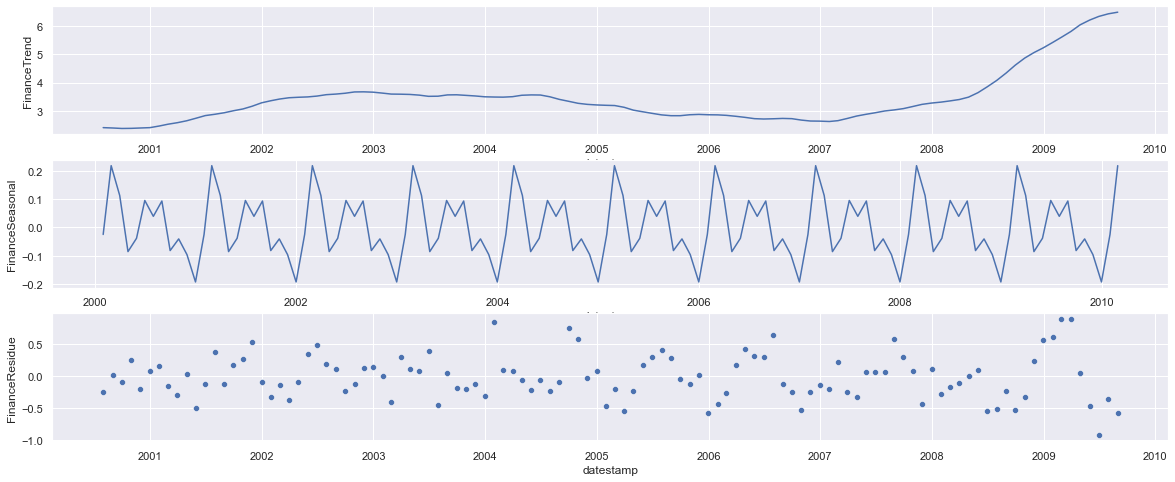

In [22]:
## Finance
fig , axes = pt.subplots(3,1,figsize=(20,8))
sns.lineplot( x = df_month_decomposition_additive.index , y = 'FinanceTrend' , data = df_month_decomposition_additive , ax=axes[0])
sns.lineplot( x = df_month_decomposition_additive.index , y = 'FinanceSeasonal' , data = df_month_decomposition_additive , ax=axes[1])
sns.scatterplot( x = df_month_decomposition_additive.index , y = 'FinanceResidue' , data = df_month_decomposition_additive , ax=axes[2])

### Answer 8

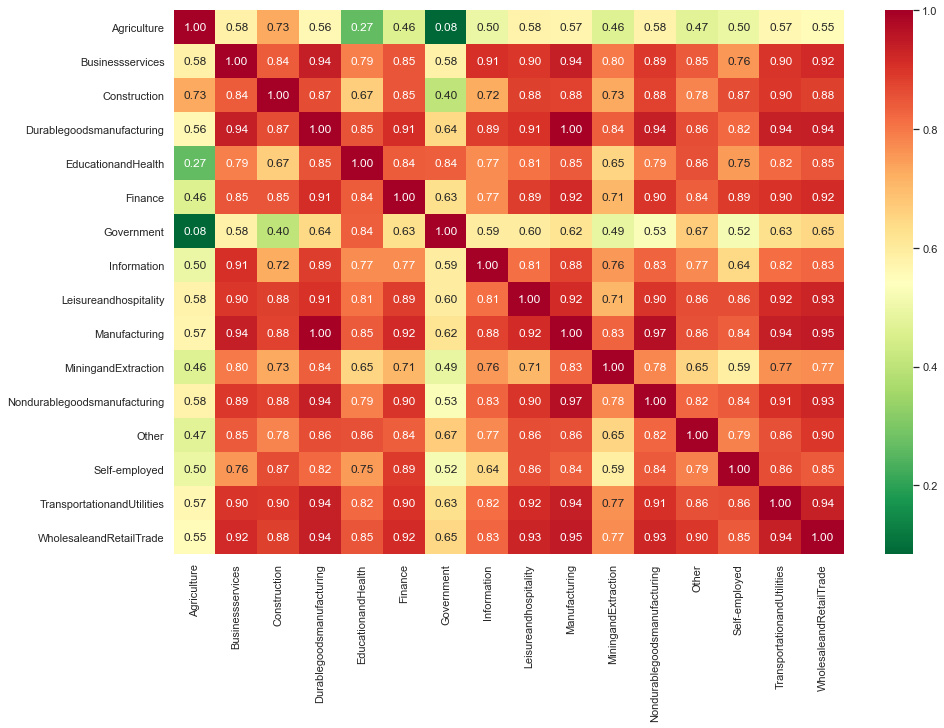

In [23]:
pt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn_r",fmt='.2f')
pt.show()